In [1]:
import os
import datetime
from tqdm import tqdm
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from championWrapper import ChampionWrapper

In [2]:
in_data = pd.read_csv('pb_table.csv', index_col=False)
champs = ChampionWrapper()

num_champs = len(champs.champToID)
num_champs


/tmp/ipykernel_12443/4058262242.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  in_data = pd.read_csv('pb_table.csv', index_col=False)


158

In [3]:
#isolate the input frames of hero choices by name
isolated_input = in_data[['BB1', 'RB1', 'BB2', 'RB2', 'BB3', 'RB3', 'BP1', 'RP1','RP2','BP2','BP3', 'RP3', 'RB4','BB4', 'RB5', 'BB5', 'RP4', 'BP4','BP5', 'RP5']]
isolated_input.head()

,BB1,RB1,BB2,RB2,BB3,RB3,BP1,RP1,RP2,BP2,BP3,RP3,RB4,BB4,RB5,BB5,RP4,BP4,BP5,RP5
0,Lulu,Pantheon,Senna,Renekton,Olaf,Camille,Udyr,Twisted Fate,Kai'Sa,Samira,Azir,Taliyah,Rell,Alistar,Gragas,Jayce,Leona,Nautilus,Gangplank,Irelia
1,Lulu,Pantheon,Senna,Renekton,Olaf,Camille,Taliyah,Kai'Sa,Twisted Fate,Samira,Rell,Udyr,Orianna,Alistar,Azir,Nautilus,Leona,Gnar,Syndra,Irelia
2,Renekton,Pantheon,Camille,Lulu,Udyr,Seraphine,Olaf,Thresh,Graves,Senna,Tahm Kench,Aphelios,Twisted Fate,Azir,Karma,Orianna,Syndra,Zoe,Malphite,Gangplank
3,Renekton,Pantheon,Camille,Lulu,Thresh,Twisted Fate,Olaf,Udyr,Kai'Sa,Senna,Tahm Kench,Azir,Orianna,Irelia,Syndra,Jayce,Gnar,Karma,LeBlanc,Blitzcrank
4,Lulu,Pantheon,Lillia,Renekton,Olaf,Rell,Taliyah,Camille,Twisted Fate,Jax,Galio,Udyr,Samira,Senna,Thresh,Alistar,Kai'Sa,Xayah,Leona,Sett


In [4]:
#Dataframe to Numpy
inputnpArray = isolated_input.to_numpy()
inputnpArray


array([['Lulu', 'Pantheon', 'Senna', ..., 'Nautilus', 'Gangplank',
        'Irelia'],
       ['Lulu', 'Pantheon', 'Senna', ..., 'Gnar', 'Syndra', 'Irelia'],
       ['Renekton', 'Pantheon', 'Camille', ..., 'Zoe', 'Malphite',
        'Gangplank'],
       ...,
       ['Renekton', 'Ziggs', 'Thresh', ..., 'Volibear', 'Rakan', 'Braum'],
       ['Ryze', 'LeBlanc', 'Tristana', ..., 'Sejuani', 'Jayce',
        'Cassiopeia'],
       ['Ryze', 'Kennen', 'Tristana', ..., 'Camille', 'Kindred', 'Jayce']],
      dtype=object)

In [5]:
# Numpy convert Names to Ids
for match in range(len(inputnpArray)):
    for column in range(len(inputnpArray[match])):
        inputnpArray[match][column] = champs.cNameToId(inputnpArray[match][column])

inputnpArray



array([[98, 71, 127, ..., 93, 41, 39],
       [98, 71, 127, ..., 114, 107, 39],
       [54, 71, 120, ..., 110, 50, 41],
       ...,
       [54, 97, 139, ..., 90, 145, 121],
       [13, 7, 18, ..., 95, 103, 63],
       [13, 76, 18, ..., 120, 123, 103]], dtype=object)

Here we have the data   
In Raw form we want to make it into [In][Label] sets to    
use in our Sequence to Sequence model   

In [6]:
#Here we have the data
# In Raw form we want to make it into [In][Label] sets to 
# use in our Sequence to Sequence model

In [7]:
numberpd = pd.DataFrame(inputnpArray, columns=['BB1', 'RB1', 'BB2', 'RB2', 'BB3', 'RB3', 'BP1', 'RP1','RP2','BP2','BP3', 'RP3', 'RB4','BB4', 'RB5', 'BB5', 'RP4', 'BP4','BP5', 'RP5'])
print(numberpd)

      BB1 RB1  BB2  RB2  BB3  RB3  BP1  RP1  RP2  BP2  BP3  RP3  RB4  BB4  \
0      98  71  127   54    2  120   68    4    0  138  136  118  149   12   
1      98  71  127   54    2  120  118    0    4  138  149   68   57   12   
2      54  71  120   98   68  113    2  139   88  127  125  151    4  136   
3      54  71  120   98  139    4    2   68    0  127  125  136   57   39   
4      98  71  157   54    2  149  118  120    4   24    3   68  138  127   
...   ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4073    4  13    7   46    5  139    0  126   78  121  151   97  156  103   
4074  139  97   54    0    4   13    7  120  104  103   46  126   92  151   
4075   54  97  139    0  123   39   13    4  120   92   96    5   46  151   
4076   13   7   18  139   92   76   97   39    0  120  144  152   57   75   
4077   13  76   18   41   97   39    7  139  136   92  121    0   46   22   

      RB5  BB5  RP4  BP4  BP5  RP5  
0      70  103   78   93   41   39  
1

In [8]:
traindf, testdf = train_test_split(numberpd, test_size=0.2)
testdf, valdf = train_test_split(testdf, test_size=0.5)

In [9]:
traindf.head()

,BB1,RB1,BB2,RB2,BB3,RB3,BP1,RP1,RP2,BP2,BP3,RP3,RB4,BB4,RB5,BB5,RP4,BP4,BP5,RP5
982,143,52,114,153,128,75,0,92,5,72,43,156,126,57,62,93,7,90,148,125
2607,143,7,151,120,5,90,0,107,92,114,110,100,18,50,0,125,147,121,146,145
2495,7,126,39,54,156,97,5,151,139,92,78,153,4,105,102,2,0,114,13,75
2160,113,68,0,157,139,120,127,149,88,67,114,110,145,103,14,72,41,107,12,122
3782,153,62,43,126,156,98,128,0,5,105,54,107,92,127,143,72,139,18,78,124


In [10]:
testdf.head()


,BB1,RB1,BB2,RB2,BB3,RB3,BP1,RP1,RP2,BP2,BP3,RP3,RB4,BB4,RB5,BB5,RP4,BP4,BP5,RP5
3599,39,0,128,7,151,137,78,21,0,72,132,145,88,4,148,3,76,13,120,79
810,148,113,54,114,124,100,68,2,143,103,110,14,125,57,139,153,107,138,149,12
2896,113,0,71,138,54,2,68,157,146,151,139,149,57,153,41,128,114,120,3,155
2993,18,113,139,118,68,100,157,0,109,146,12,149,114,107,134,57,54,70,128,94
1382,4,128,148,139,110,125,0,100,12,68,57,18,149,136,70,103,114,93,54,94


In [11]:
valdf.head()

,BB1,RB1,BB2,RB2,BB3,RB3,BP1,RP1,RP2,BP2,BP3,RP3,RB4,BB4,RB5,BB5,RP4,BP4,BP5,RP5
20,139,118,54,71,67,2,120,4,88,157,128,0,3,70,149,96,24,122,78,12
2261,0,127,148,139,153,156,5,7,90,98,75,54,82,149,128,143,72,92,93,78
2926,54,139,2,7,46,92,126,97,13,122,105,78,128,103,153,5,90,39,95,114
3155,153,75,5,156,139,126,62,90,18,52,72,43,121,57,145,58,78,93,103,136
2408,62,75,105,156,139,5,0,153,52,126,18,67,93,151,98,72,97,13,3,54


In [12]:
traindf.shape

(3262, 20)

In [13]:
testdf.shape

(408, 20)

In [14]:
valdf.shape

(408, 20)

In [15]:
from WindowGenerator import WindowGenerator

wg = WindowGenerator(9, 1, 1, train_df=traindf, val_df=valdf, test_df=testdf, label_columns=None)
wg

Total window size: 10
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [9]
Label column name(s): None

2022-03-22 16:03:19.110348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-22 16:03:19.110787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2e:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-22 16:03:19.116399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-03-22 16:03:19.116408: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required

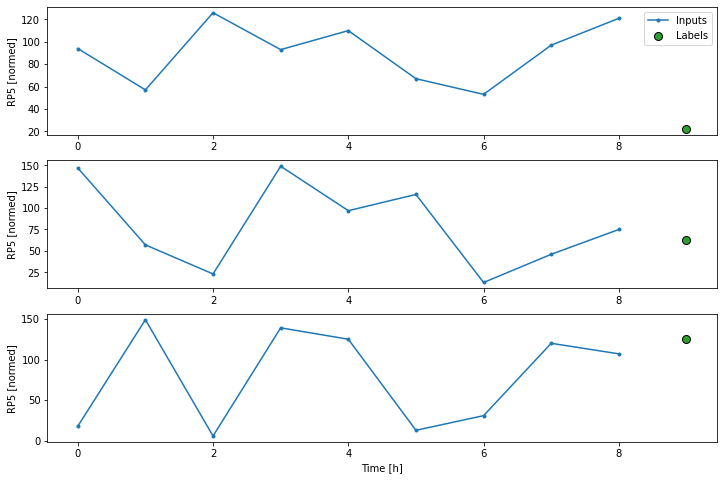

In [16]:
wg.plot()

In [17]:
print(wg.train_df)

      BB1  RB1  BB2  RB2  BB3  RB3  BP1  RP1  RP2  BP2  BP3  RP3  RB4  BB4  \
982   143   52  114  153  128   75    0   92    5   72   43  156  126   57   
2607  143    7  151  120    5   90    0  107   92  114  110  100   18   50   
2495    7  126   39   54  156   97    5  151  139   92   78  153    4  105   
2160  113   68    0  157  139  120  127  149   88   67  114  110  145  103   
3782  153   62   43  126  156   98  128    0    5  105   54  107   92  127   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1210   67  139  110  120  157   54    0   12   68   70    2  138   57  114   
2723  126   54  128  125   92   97    5  132  144  151  139  138   57   51   
3159   52   62  153   75  139    5    0   72   54  126  105   43   93   30   
1532  105    2   52  126    7  103    5    0  156   92   93  143   75   78   
289    98  128  127    0   76   68  156   62   92   54   67   41   72  139   

      RB5  BB5  RP4  BP4  BP5  RP5  
982    62   93    7   90  

In [18]:
OUT_STEPS = 2
multi_window = WindowGenerator(input_width=8,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, 
                               train_df=traindf,
                               val_df=valdf,
                               test_df=testdf)

multi_window.plot
multi_window

Total window size: 10
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [8 9]
Label column name(s): None

13/13 [==============================] - 0s 652us/step - loss: 4966.9795 - mean_absolute_error: 56.7168


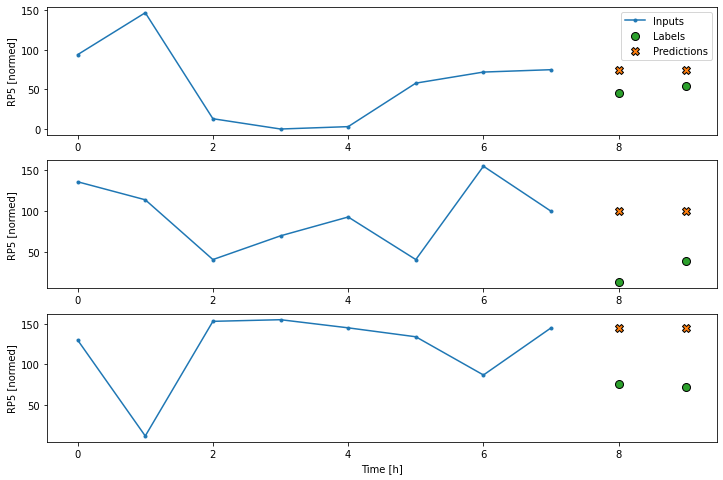

In [19]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

In [20]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history



13/13 [==============================] - 0s 666us/step - loss: 2588.9832 - mean_absolute_error: 43.7623


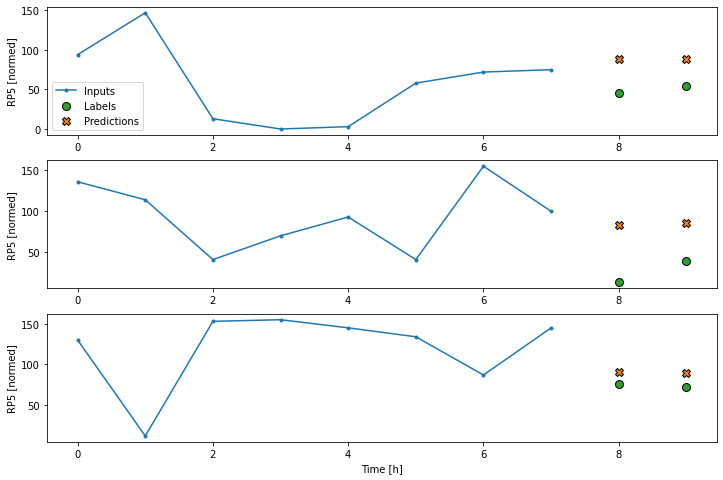

In [21]:
num_features = testdf.shape[1]
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

13/13 [==============================] - 0s 927us/step - loss: 2578.4438 - mean_absolute_error: 43.5660


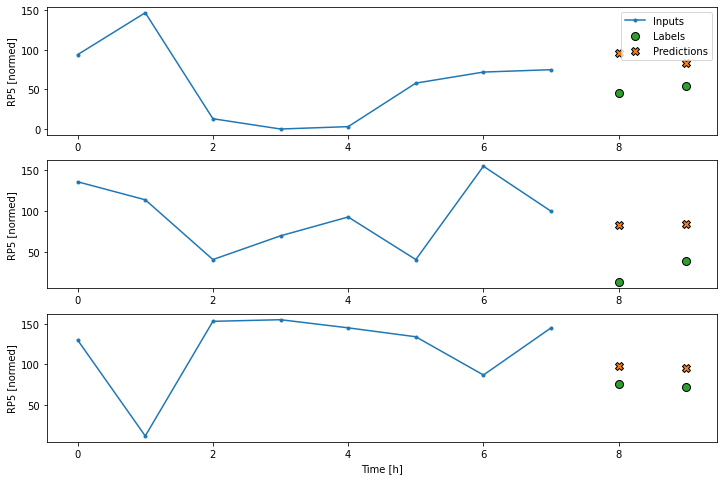

In [22]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

13/13 [==============================] - 0s 860us/step - loss: 2558.9331 - mean_absolute_error: 43.5780


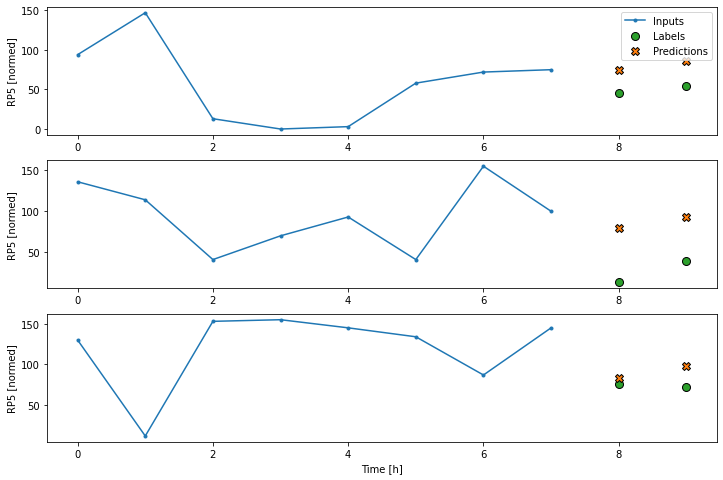

In [23]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

13/13 [==============================] - 0s 1ms/step - loss: 3413.3684 - mean_absolute_error: 50.4577


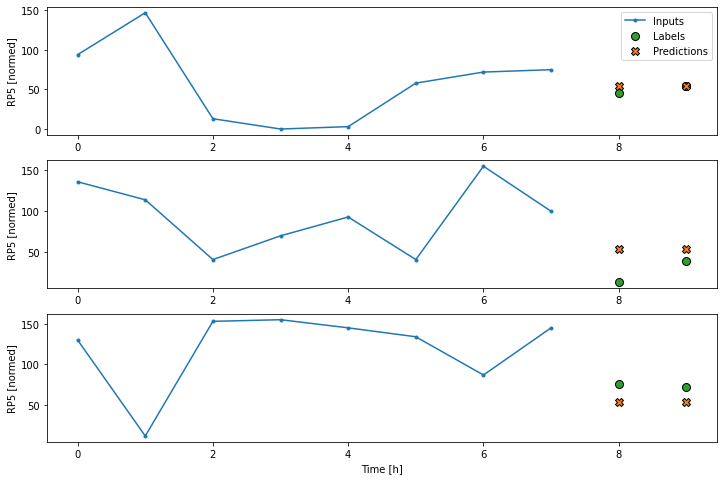

In [24]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)